# 270F Final Project: Water Conservation Supplier Compliance


In [219]:
import pandas as pd 
import numpy as np
#import seaborn as sc
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import accuracy_score
df= pd.read_csv('C:/Users/yradsmikham/Desktop/Jupyter/270F- Final PRoject/supplier_compliance.csv', skipinitialspace=True)
df

,Supplier Name,Hydrologic Region,State-mandated Conservation Standard - Previous (3/1/2016),State-mandated Conservation Standard - Current (Effective 6/1/2016),Did Supplier Self-certify?,Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,June 2016 to Aug 2016 Self-certified?,Applicable Cumulative Savings by Supplier (as compared to 2013),Missed Conservation Standard By,Order Status,Monthly Savings (as compared to 2013) - Aug 2015,Monthly Savings (as compared to 2013) - Aug 2016,Estimated Aug 2016 Monthly R-GPCD,Total Population Served
0,California City City of,South Lahontan,28%,28%,No,13.10%,18.00%,13.10%,14.90%,C,16.80%,20.50%,148.5,"14,120"
1,Yucaipa Valley Water District,South Coast,34%,20%,Yes,18.30%,7.10%,7.10%,12.90%,NaN,26.40%,11.90%,260.0,"45,018"
2,Sanger City of,Tulare Lake,26%,26%,No,17.30%,12.40%,17.30%,8.70%,NaN,38.00%,17.20%,181.1,"25,664"
3,Adelanto City of,South Lahontan,16%,16%,No,9.30%,-10.30%,9.30%,6.70%,C,20.50%,-30.60%,125.5,"29,023"
4,Red Bluff City of,Sacramento River,33%,33%,No,27.80%,19.50%,27.80%,5.20%,NaN,42.40%,30.80%,202.9,"14,076"
5,Bellflower-Somerset Mutual Water Company,South Coast,20%,20%,Yes,18.30%,16.40%,16.40%,3.60%,NaN,19.20%,14.10%,87.7,"46,300"
6,Bakman Water Company,Tulare Lake,34%,34%,No,30.70%,34.30%,30.70%,3.30%,NaN,36.10%,35.90%,192.5,"16,756"
7,North Marin Water District,San Francisco Bay,24%,0%,Yes,22.70%,-2.90%,-2.90%,2.90%,NaN,34.70%,12.90%,135.3,"61,299"
8,San Lorenzo Valley Water District,Central Coast,12%,18%,Yes,22.50%,15.10%,15.10%,2.90%,NaN,23.90%,12.90%,109.5,"19,000"
9,Fillmore City of,South Coast,26%,26%,No,23.40%,22.60%,23.40%,2.60%,NaN,22.60%,20.10%,137.7,"15,222"


In [220]:
df.iloc[:,[2,3,5,6,7,8,10,11]] = df.iloc[:,[2,3,5,6,7,8,10,11]].replace('%','',regex=True).apply(pd.to_numeric)/100
df.iloc[:,13] = df.iloc[:,13].replace(',','',regex=True).apply(pd.to_numeric)
df.dtypes

Supplier Name                                                                         object
Hydrologic Region                                                                     object
State-mandated Conservation Standard - Previous (3/1/2016)                           float64
State-mandated Conservation Standard - Current (Effective 6/1/2016)                  float64
Did Supplier Self-certify?                                                            object
Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016    float64
June 2016 to Aug 2016 Self-certified?                                                float64
Applicable Cumulative Savings by Supplier (as compared to 2013)                      float64
Missed Conservation Standard By                                                      float64
Order Status                                                                          object
Monthly Savings (as compared to 2013) - Aug 2015                      

In [221]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Supplier Name,389,389,Estero Municipal Improvement District,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hydrologic Region,389,10,South Coast,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State-mandated Conservation Standard - Previous (3/1/2016),389,NaN,NaN,NaN,0.217609,0.0796072,0.04,0.16,0.22,0.28,0.36
State-mandated Conservation Standard - Current (Effective 6/1/2016),389,NaN,NaN,NaN,0.0231362,0.0638614,0,0,0,0,0.34
Did Supplier Self-certify?,389,2,Yes,361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,389,NaN,NaN,NaN,0.242018,0.0684349,0.046,0.199,0.239,0.281,0.484
June 2016 to Aug 2016 Self-certified?,389,NaN,NaN,NaN,0.202856,0.0712076,-0.103,0.159,0.201,0.241,0.479
Applicable Cumulative Savings by Supplier (as compared to 2013),389,NaN,NaN,NaN,0.20482,0.0708853,-0.029,0.16,0.203,0.243,0.481
Missed Conservation Standard By,389,NaN,NaN,NaN,-0.181684,0.0822554,-0.479,-0.227,-0.188,-0.144,0.149
Order Status,7,2,A,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
df

,Supplier Name,Hydrologic Region,State-mandated Conservation Standard - Previous (3/1/2016),State-mandated Conservation Standard - Current (Effective 6/1/2016),Did Supplier Self-certify?,Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,June 2016 to Aug 2016 Self-certified?,Applicable Cumulative Savings by Supplier (as compared to 2013),Missed Conservation Standard By,Order Status,Monthly Savings (as compared to 2013) - Aug 2015,Monthly Savings (as compared to 2013) - Aug 2016,Estimated Aug 2016 Monthly R-GPCD,Total Population Served
0,California City City of,South Lahontan,0.28,0.28,No,0.131,0.180,0.131,0.149,C,0.168,0.205,148.5,14120
1,Yucaipa Valley Water District,South Coast,0.34,0.20,Yes,0.183,0.071,0.071,0.129,NaN,0.264,0.119,260.0,45018
2,Sanger City of,Tulare Lake,0.26,0.26,No,0.173,0.124,0.173,0.087,NaN,0.380,0.172,181.1,25664
3,Adelanto City of,South Lahontan,0.16,0.16,No,0.093,-0.103,0.093,0.067,C,0.205,-0.306,125.5,29023
4,Red Bluff City of,Sacramento River,0.33,0.33,No,0.278,0.195,0.278,0.052,NaN,0.424,0.308,202.9,14076
5,Bellflower-Somerset Mutual Water Company,South Coast,0.20,0.20,Yes,0.183,0.164,0.164,0.036,NaN,0.192,0.141,87.7,46300
6,Bakman Water Company,Tulare Lake,0.34,0.34,No,0.307,0.343,0.307,0.033,NaN,0.361,0.359,192.5,16756
7,North Marin Water District,San Francisco Bay,0.24,0.00,Yes,0.227,-0.029,-0.029,0.029,NaN,0.347,0.129,135.3,61299
8,San Lorenzo Valley Water District,Central Coast,0.12,0.18,Yes,0.225,0.151,0.151,0.029,NaN,0.239,0.129,109.5,19000
9,Fillmore City of,South Coast,0.26,0.26,No,0.234,0.226,0.234,0.026,NaN,0.226,0.201,137.7,15222


In [223]:
#Correlation Table
corr = df.corr()
corr

,State-mandated Conservation Standard - Previous (3/1/2016),State-mandated Conservation Standard - Current (Effective 6/1/2016),Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,June 2016 to Aug 2016 Self-certified?,Applicable Cumulative Savings by Supplier (as compared to 2013),Missed Conservation Standard By,Monthly Savings (as compared to 2013) - Aug 2015,Monthly Savings (as compared to 2013) - Aug 2016,Estimated Aug 2016 Monthly R-GPCD,Total Population Served
State-mandated Conservation Standard - Previous (3/1/2016),1.000000,0.119652,0.487124,0.284381,0.289372,-0.156477,0.416825,0.169345,0.751668,-0.135968
State-mandated Conservation Standard - Current (Effective 6/1/2016),0.119652,1.000000,0.146387,0.168168,0.258134,0.553928,0.104832,0.177243,0.104855,-0.071906
Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,0.487124,0.146387,1.000000,0.840911,0.851498,-0.620144,0.810566,0.658547,0.428711,-0.111819
June 2016 to Aug 2016 Self-certified?,0.284381,0.168168,0.840911,1.000000,0.974463,-0.709202,0.614935,0.834198,0.156028,-0.075887
Applicable Cumulative Savings by Supplier (as compared to 2013),0.289372,0.258134,0.851498,0.974463,1.000000,-0.661361,0.629863,0.793444,0.184813,-0.084115
Missed Conservation Standard By,-0.156477,0.553928,-0.620144,-0.709202,-0.661361,1.000000,-0.461408,-0.546159,-0.077859,0.016662
Monthly Savings (as compared to 2013) - Aug 2015,0.416825,0.104832,0.810566,0.614935,0.629863,-0.461408,1.000000,0.585345,0.396457,-0.076487
Monthly Savings (as compared to 2013) - Aug 2016,0.169345,0.177243,0.658547,0.834198,0.793444,-0.546159,0.585345,1.000000,0.023549,-0.043824
Estimated Aug 2016 Monthly R-GPCD,0.751668,0.104855,0.428711,0.156028,0.184813,-0.077859,0.396457,0.023549,1.000000,-0.106280
Total Population Served,-0.135968,-0.071906,-0.111819,-0.075887,-0.084115,0.016662,-0.076487,-0.043824,-0.106280,1.000000


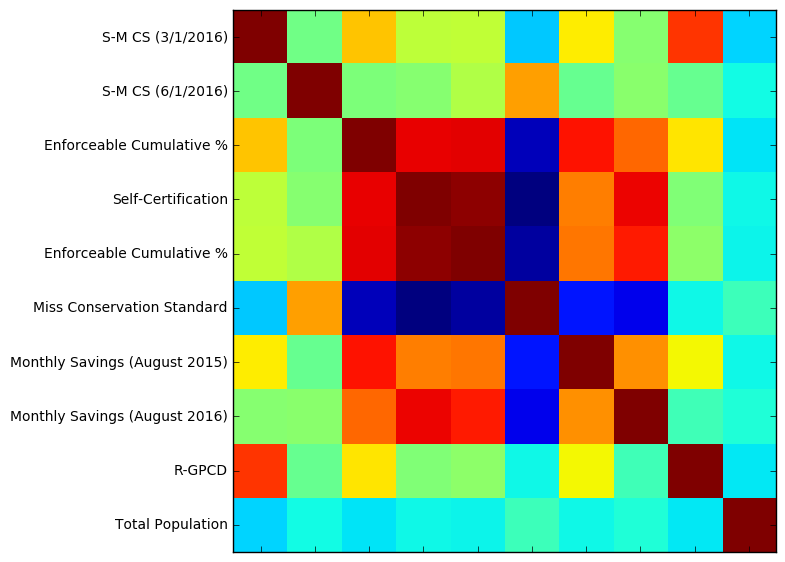

In [224]:
#Plot Correlation Matrix
size=7
names = ['S-M CS (3/1/2016)', 'S-M CS (6/1/2016)', 'Enforceable Cumulative %', 'Self-Certification', 'Enforceable Cumulative %', 'Miss Conservation Standard', 'Monthly Savings (August 2015)', 'Monthly Savings (August 2016)', 'R-GPCD', 'Total Population']
corr = df.corr()
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);
ax.set_xticklabels([])
ax.set_yticklabels(names)
plt.show()

In [225]:
df['Type'] = df['Missed Conservation Standard By'].map(lambda x: 0 if x > 0 else 1) # 0= Fail, 1= Pass
df

,Supplier Name,Hydrologic Region,State-mandated Conservation Standard - Previous (3/1/2016),State-mandated Conservation Standard - Current (Effective 6/1/2016),Did Supplier Self-certify?,Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,June 2016 to Aug 2016 Self-certified?,Applicable Cumulative Savings by Supplier (as compared to 2013),Missed Conservation Standard By,Order Status,Monthly Savings (as compared to 2013) - Aug 2015,Monthly Savings (as compared to 2013) - Aug 2016,Estimated Aug 2016 Monthly R-GPCD,Total Population Served,Type
0,California City City of,South Lahontan,0.28,0.28,No,0.131,0.180,0.131,0.149,C,0.168,0.205,148.5,14120,0
1,Yucaipa Valley Water District,South Coast,0.34,0.20,Yes,0.183,0.071,0.071,0.129,NaN,0.264,0.119,260.0,45018,0
2,Sanger City of,Tulare Lake,0.26,0.26,No,0.173,0.124,0.173,0.087,NaN,0.380,0.172,181.1,25664,0
3,Adelanto City of,South Lahontan,0.16,0.16,No,0.093,-0.103,0.093,0.067,C,0.205,-0.306,125.5,29023,0
4,Red Bluff City of,Sacramento River,0.33,0.33,No,0.278,0.195,0.278,0.052,NaN,0.424,0.308,202.9,14076,0
5,Bellflower-Somerset Mutual Water Company,South Coast,0.20,0.20,Yes,0.183,0.164,0.164,0.036,NaN,0.192,0.141,87.7,46300,0
6,Bakman Water Company,Tulare Lake,0.34,0.34,No,0.307,0.343,0.307,0.033,NaN,0.361,0.359,192.5,16756,0
7,North Marin Water District,San Francisco Bay,0.24,0.00,Yes,0.227,-0.029,-0.029,0.029,NaN,0.347,0.129,135.3,61299,0
8,San Lorenzo Valley Water District,Central Coast,0.12,0.18,Yes,0.225,0.151,0.151,0.029,NaN,0.239,0.129,109.5,19000,0
9,Fillmore City of,South Coast,0.26,0.26,No,0.234,0.226,0.234,0.026,NaN,0.226,0.201,137.7,15222,0


In [226]:
#Define training and test sets
split = np.random.rand(len(df)) < 0.75
train = df[split]
test = df[~split]

In [227]:
#Call Gaussian Naive Bayesian class with default parameters
clf = GaussianNB()

#Train model
clf.fit(train.iloc[:,13:14], train['Type'])

#Prediction
prediction= clf.predict(test.iloc[:,13:14])
print(prediction)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [228]:
#Accuracy, F1 Score, Recall, and Precision Scores
print("Accuracy:", accuracy_score(test['Type'], prediction))
print("F1 Score:", f1_score(test['Type'], prediction, average= 'binary'))
print("Recall Score:", recall_score(test['Type'], prediction))
print("Precision Score:", precision_score(test['Type'], prediction))

Accuracy: 0.978494623656
F1 Score: 0.989130434783
Recall Score: 1.0
Precision Score: 0.978494623656


In [229]:
#Filtering out "Self-Certified" data
df2 = df.loc[df['Did Supplier Self-certify?'] != 'Yes']
df2

,Supplier Name,Hydrologic Region,State-mandated Conservation Standard - Previous (3/1/2016),State-mandated Conservation Standard - Current (Effective 6/1/2016),Did Supplier Self-certify?,Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,June 2016 to Aug 2016 Self-certified?,Applicable Cumulative Savings by Supplier (as compared to 2013),Missed Conservation Standard By,Order Status,Monthly Savings (as compared to 2013) - Aug 2015,Monthly Savings (as compared to 2013) - Aug 2016,Estimated Aug 2016 Monthly R-GPCD,Total Population Served,Type
0,California City City of,South Lahontan,0.28,0.28,No,0.131,0.180,0.131,0.149,C,0.168,0.205,148.5,14120,0
2,Sanger City of,Tulare Lake,0.26,0.26,No,0.173,0.124,0.173,0.087,NaN,0.380,0.172,181.1,25664,0
3,Adelanto City of,South Lahontan,0.16,0.16,No,0.093,-0.103,0.093,0.067,C,0.205,-0.306,125.5,29023,0
4,Red Bluff City of,Sacramento River,0.33,0.33,No,0.278,0.195,0.278,0.052,NaN,0.424,0.308,202.9,14076,0
6,Bakman Water Company,Tulare Lake,0.34,0.34,No,0.307,0.343,0.307,0.033,NaN,0.361,0.359,192.5,16756,0
9,Fillmore City of,South Coast,0.26,0.26,No,0.234,0.226,0.234,0.026,NaN,0.226,0.201,137.7,15222,0
12,"Los Banos, City of",San Joaquin River,0.24,0.24,No,0.244,0.218,0.244,-0.004,NaN,0.246,0.199,144.5,37168,1
13,Atwater City of,San Joaquin River,0.33,0.33,No,0.336,0.223,0.336,-0.006,NaN,0.329,0.114,264.4,29500,1
14,Pico Rivera City of,South Coast,0.16,0.16,No,0.172,0.157,0.172,-0.012,NaN,0.187,0.159,91.2,39002,1
15,"Tehachapi, City of",Tulare Lake,0.25,0.25,No,0.264,0.219,0.264,-0.014,NaN,0.198,0.188,194.8,8923,1


In [230]:
# define training and test sets
split2 = np.random.rand(len(df2)) < 0.75
train2 = df2[split2]
test2 = df2[~split2]
#train2.groupby('Type').count()

In [231]:
# call Gaussian Naive Bayesian class with default parameters
clf2 = GaussianNB()

# train model
clf2.fit(train2.iloc[:,13:14], train2['Type'])

#Prediction
prediction2= clf2.predict(test2.iloc[:,13:14])
print(prediction2)

[1 0 0 0 1 1 1 0 1]


In [232]:
#Accuracy, F1 Score, Recall, and Precision Scores
print("Accuracy:", accuracy_score(test2['Type'], prediction2))
print("F1 Score:", f1_score(test2['Type'], prediction2, average= 'binary'))
print("Recall Score:", recall_score(test2['Type'], prediction2))
print("Precision Score:", precision_score(test2['Type'], prediction2))

Accuracy: 0.666666666667
F1 Score: 0.727272727273
Recall Score: 0.666666666667
Precision Score: 0.8
